# Title: Comparative analysis of human and machine agents on a two route map
## Name: Anastasia
### Date: October 2, 2024
---

### Description

> This notebook presents a comparative analysis of six distinct agent behaviors in a navigation system. Each experiment begins with 20 human agents, who initially learn to navigate the optimal route. After 200 episodes and since they have converged, 50% of these human agents are replaced by machine agents. The machine agents, , utilizing the Deep Q-Network (DQN) algorithm, also learn to identify the optimal route. Following 1000 episodes of machine agent learning, their training is paused and the human agents resume the learning process for 200 more episodes..
---

### Objective

> The objective of this notebook is to examine how variations in the collective behavior of autonomous vehicles (AVs) can influence human agents' decision-making, leading them to choose different paths from the one they initially converged on.
---

## Experiment Summary

### Network Architecture
- Two route network
---

### Episodes
- 200 human learning - 1000 machine learning - 200 human learning
---


### Agents
| **Type**          |           |
|-------------------|---------------------|
| **Number**        | 20 humans(before mutation) -> 10 humans, 10 machines (after mutation) |
| **Total demand** | random |
---


### Origin and Destination Details
| **Origin Count**      | 1                          |
|-----------------------|----------------------------|
| **Destination Count** | 1                          |

All the agents have the same origin and destination points.

---


### Execution time
| **Experiments**      | **Time**                      |
|-----------------------|------------------------------|
|  DQN algorithm        |        around 6-7h (gpu)        |
---

    

### Hardware Utilized for Experiment Execution
The experiments run on the server.
| **Type of Machine** | Server |
|----------------------|-------------------------------|
| **Parition**         | dgx                           |
| **Memory**           | 64GB                          |
| **GPU**              | 1                             |
| **Operating System** | Linux                         |
| **QoS(how long the job runs)**| big                    |
---

## Action shifts for AV and humans across different behaviors

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes
Processing folder: training_records/dqn_altruistic_halfnet_20agents/episodes
Processing folder: training_records/dqn_social_halfnet_20agents/episodes
Processing folder: training_records/dqn_malicious_halfnet_20agents/episodes
Processing folder: training_records/dqn_collaborative_halfnet_20agents/episodes
Processing folder: training_records/dqn_competitive_halfnet_20agents/episodes
Processing folder: training_records/dqn_selfish_halfnet_20agents/episodes
Processing folder: training_records/dqn_altruistic_3quartern

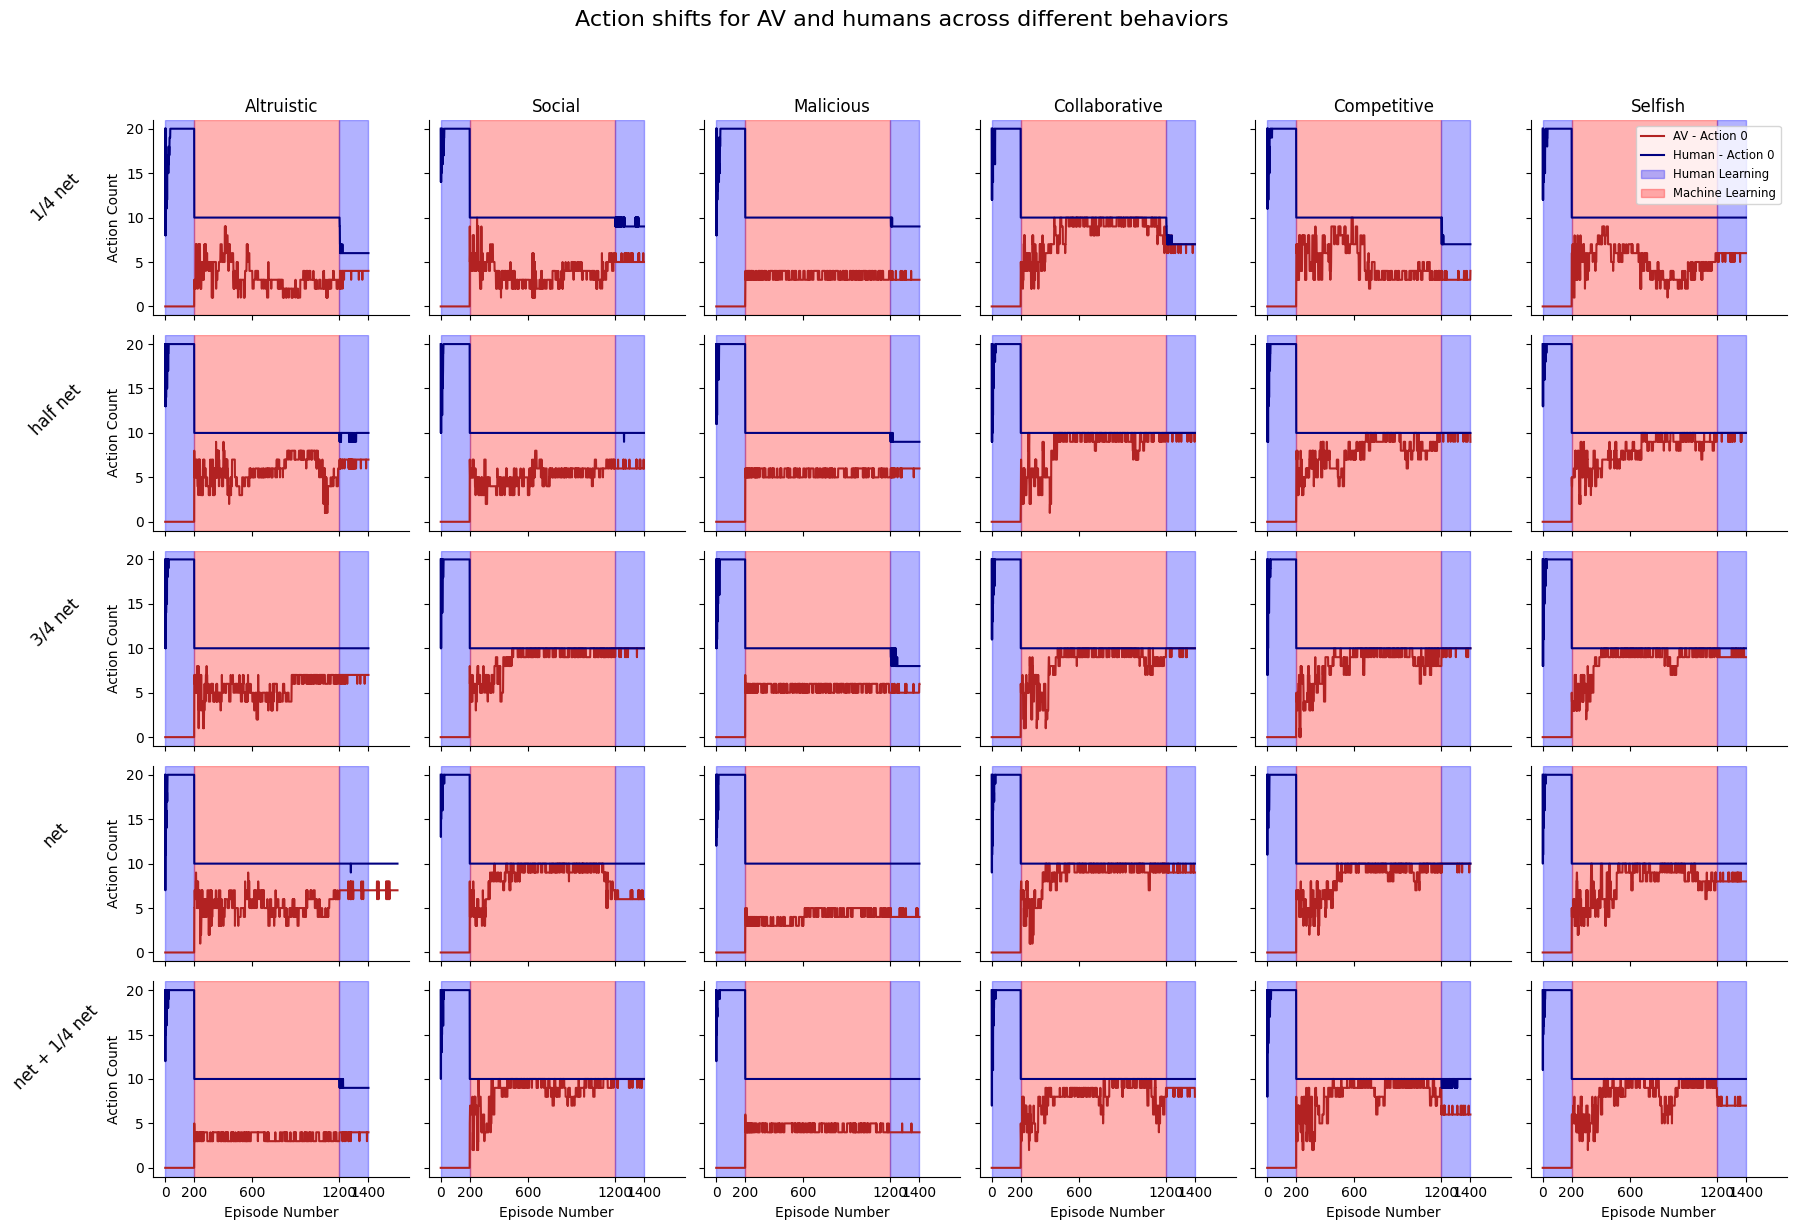

In [2]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define folder paths (first row) and additional folder paths (second row)
folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

additional_folder_paths = [
                'training_records/dqn_altruistic_halfnet_20agents/episodes',
                'training_records/dqn_social_halfnet_20agents/episodes',
                'training_records/dqn_malicious_halfnet_20agents/episodes',
                'training_records/dqn_collaborative_halfnet_20agents/episodes',
                'training_records/dqn_competitive_halfnet_20agents/episodes',
                'training_records/dqn_selfish_halfnet_20agents/episodes',
                'training_records/dqn_altruistic_3quarternet_20agents/episodes',
                'training_records/dqn_social_3quarternet_20agents/episodes',
                'training_records/dqn_malicious_3quarternet_20agents/episodes',
                'training_records/dqn_collaborative_3quarternet_20agents/episodes',
                'training_records/dqn_competitive_3quarternet_20agents/episodes',
                'training_records/dqn_selfish_3quarternet_20agents/episodes',
                'training_records/dqn_altruistic_net_20agents/episodes',
                'training_records/dqn_social_net_20agents_2/episodes',
                'training_records/dqn_malicious_net_20agents_2/episodes',
                'training_records/dqn_collaborative_net_20agents_2/episodes',
                'training_records/dqn_competitive_net_20agents_2/episodes',
                'training_records/dqn_selfish_net_20agents_2/episodes',
                'training_records/dqn_altruistic_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_social_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_malicious_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_collaborative_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_competitive_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_selfish_1quarterbiggernet_20agents/episodes']

# Update legends for additional folders
legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',  
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Combine the folder paths and their legends
all_folder_paths = folder_paths + additional_folder_paths
all_legends = legend

# Assign row labels (first 6 for row 1, the rest for row 2)
row_labels = ['1/4 net'] * len(folder_paths) + ['half net'] * 6 + ['3/4 net'] * 6 + ['net'] * 6 + ['net + 1/4 net'] * 6

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Prepare an empty list to store the data for all folders
all_data = []

# Iterate through all folder paths and their corresponding row labels
for i, (folder_path, legend_name, row_label) in enumerate(zip(all_folder_paths, all_legends, row_labels)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Count the number of AVs choosing action 0
        av_action_0_count = (av_df['action'] == 0).sum()

        # Count the number of Humans choosing action 0
        human_action_0_count = (human_df['action'] == 0).sum()

        # Append the data to the all_data list
        all_data.append({
            'Episode': episode_number,
            'Action Count': av_action_0_count,
            'Kind': 'AV - Action 0',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })
        all_data.append({
            'Episode': episode_number,
            'Action Count': human_action_0_count,
            'Kind': 'Human - Action 0',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })

# Convert the list into a pandas DataFrame
data = pd.DataFrame(all_data)

# Smooth the action counts using uniform_filter1d for each combination of kind and scenario
for kind in data['Kind'].unique():
    for scenario in data['Scenario'].unique():
        mask = (data['Kind'] == kind) & (data['Scenario'] == scenario)
        #data.loc[mask, 'Action Count'] = uniform_filter1d(data.loc[mask, 'Action Count'], size=100)

# Create a FacetGrid with seaborn to plot different scenarios in columns and rows
g = sns.FacetGrid(data, col="Scenario", hue="Kind", row="Row", height=2.5, aspect=1.2, sharey=True, sharex=True)

# Map the lineplot to each facet
g.map(sns.lineplot, "Episode", "Action Count")

# Set the first line to red (AV) and the second to blue (Human)
for ax in g.axes.flat:
    ax.lines[0].set_color("firebrick")  # First line for 'AV'
    ax.lines[1].set_color("navy")       # Second line for 'Human'

    # Set y-ticks and x-ticks
    ax.set_yticks([0, 5, 10, 15, 20])

# Add background shading for the different learning phases in each plot
for ax in g.axes.flat:
    ax.axvspan(0, 200, color='blue', alpha=0.3, label='Human Learning')          # Shade 0-200 for human learning
    ax.axvspan(200, 1200, color='red', alpha=0.3, label='Machine Learning')    # Shade 200-1200 for machine learning
    ax.axvspan(1200, 1400, color='blue', alpha=0.3)                              # Shade 1200-1400 for human learning again
    
    
    ax.set_xticks([0, 200, 600, 1200, 1400])

# Set the axis labels
g.set_axis_labels('Episode Number', 'Action Count')

g.set_titles(row_template="", col_template="{col_name}")


row_titles = data['Row'].unique()
for i, ax in enumerate(g.axes.flat):
    if i < len(g.col_names):  # First row (based on the number of columns)
        ax.set_title(g.col_names[i], fontsize=12)  # Use column name as title
    else:  # For subsequent rows
        ax.set_title(f"", fontsize=12)

# Add a legend to the top-right plot of the first row
# Find the axis for the last plot in the first row (rightmost)
rightmost_ax_first_row = g.axes[0, -1]

# Manually add the legend to this specific axis
rightmost_ax_first_row.legend(loc='upper right', fontsize='small', frameon=True)

row_titles = data['Row'].unique()
for i, row_title in enumerate(row_titles):
    g.fig.text(0.03, 0.83 - i * 0.17, row_title, va='center', ha='center', rotation=45, fontsize=12)

g.fig.suptitle('Action shifts for AV and human drivers across different behaviors', fontsize=16)

# Adjust layout to avoid overlap and improve clarity
plt.tight_layout(rect=[0.05, 0, 1, 0.95])

# Display the plot
plt.show()

## Mean reward for AV and humans across different behaviors

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes
Processing folder: training_records/dqn_altruistic_halfnet_20agents/episodes
Processing folder: training_records/dqn_social_halfnet_20agents/episodes
Processing folder: training_records/dqn_malicious_halfnet_20agents/episodes
Processing folder: training_records/dqn_collaborative_halfnet_20agents/episodes
Processing folder: training_records/dqn_competitive_halfnet_20agents/episodes
Processing folder: training_records/dqn_selfish_halfnet_20agents/episodes
Processing folder: training_records/dqn_altruistic_3quartern

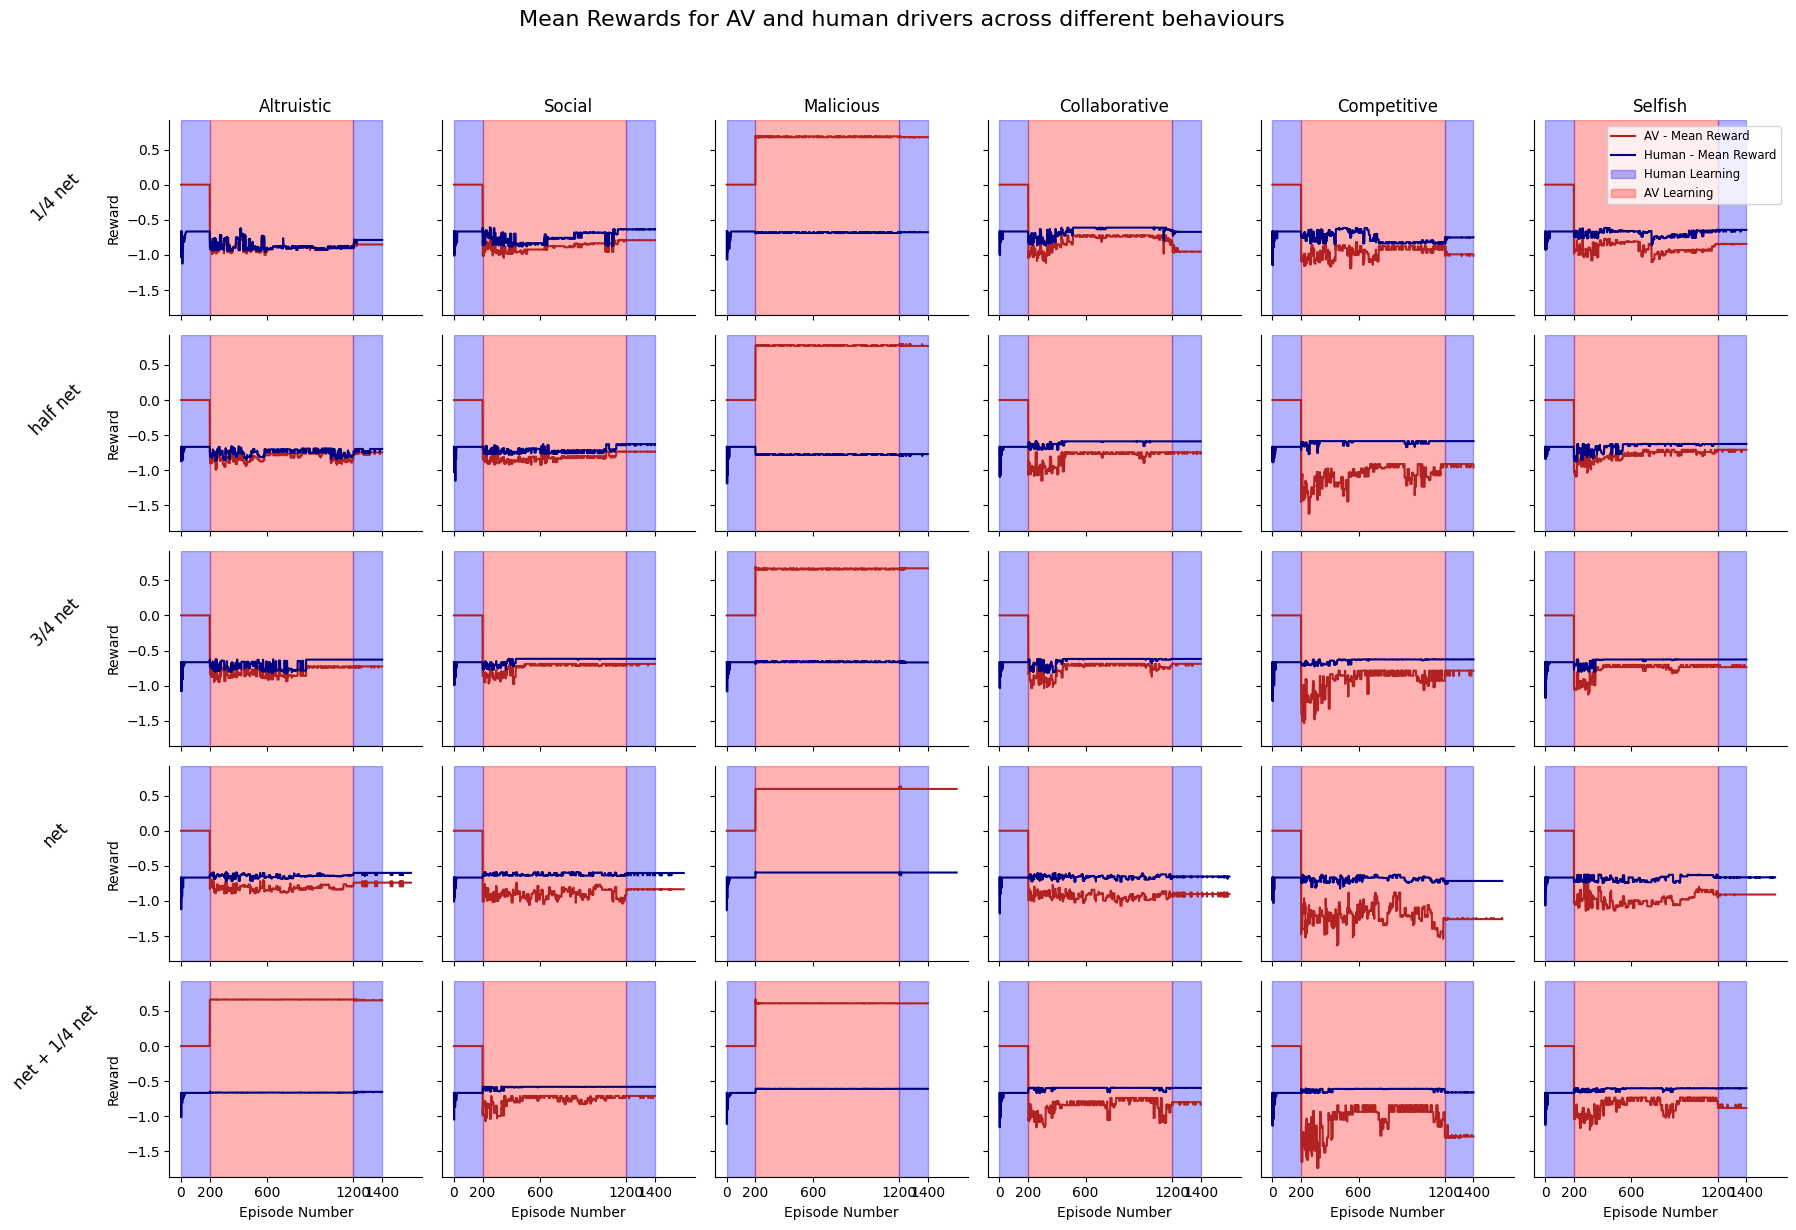

In [34]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define folder paths (first row) and additional folder paths (second row)
folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

additional_folder_paths = [
                'training_records/dqn_altruistic_halfnet_20agents/episodes',
                'training_records/dqn_social_halfnet_20agents/episodes',
                'training_records/dqn_malicious_halfnet_20agents/episodes',
                'training_records/dqn_collaborative_halfnet_20agents/episodes',
                'training_records/dqn_competitive_halfnet_20agents/episodes',
                'training_records/dqn_selfish_halfnet_20agents/episodes',
                'training_records/dqn_altruistic_3quarternet_20agents/episodes',
                'training_records/dqn_social_3quarternet_20agents/episodes',
                'training_records/dqn_malicious_3quarternet_20agents/episodes',
                'training_records/dqn_collaborative_3quarternet_20agents/episodes',
                'training_records/dqn_competitive_3quarternet_20agents/episodes',
                'training_records/dqn_selfish_3quarternet_20agents/episodes',
                'training_records/dqn_altruistic_net_20agents/episodes',
                'training_records/dqn_social_net_20agents/episodes',
                'training_records/dqn_malicious_net_20agents/episodes',
                'training_records/dqn_collaborative_net_20agents/episodes',
                'training_records/dqn_competitive_net_20agents/episodes',
                'training_records/dqn_selfish_net_20agents/episodes',
                'training_records/dqn_altruistic_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_social_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_malicious_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_collaborative_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_competitive_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_selfish_1quarterbiggernet_20agents/episodes']

# Update legends for additional folders
legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',  
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Combine the folder paths and their legends
all_folder_paths = folder_paths + additional_folder_paths
all_legends = legend

# Assign row labels (first 6 for row 1, the rest for row 2)
row_labels = ['1/4 net'] * len(folder_paths) + ['half net'] * 6 + ['3/4 net'] * 6 + ['net'] * 6 + ['net + 1/4 net'] * 6

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Prepare an empty list to store the data for all folders
all_data = []

# Iterate through all folder paths and their corresponding row labels
for i, (folder_path, legend_name, row_label) in enumerate(zip(all_folder_paths, all_legends, row_labels)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Calculate the mean reward for AVs and Humans
        av_mean_reward = av_df['reward'].mean()
        human_mean_reward = human_df['reward'].mean()

        # Append the data to the all_data list
        all_data.append({
            'Episode': episode_number,
            'Mean Reward': av_mean_reward,
            'Kind': 'AV - Mean Reward',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })
        all_data.append({
            'Episode': episode_number,
            'Mean Reward': human_mean_reward,
            'Kind': 'Human - Mean Reward',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })

# Convert the list into a pandas DataFrame
data = pd.DataFrame(all_data)

# Smooth the mean rewards using uniform_filter1d for each combination of kind and scenario
for kind in data['Kind'].unique():
    for scenario in data['Scenario'].unique():
        mask = (data['Kind'] == kind) & (data['Scenario'] == scenario)
        data.loc[mask, 'Mean Reward'] = uniform_filter1d(data.loc[mask, 'Mean Reward'].fillna(0), size=1)

# Create a FacetGrid with seaborn to plot different scenarios in columns and rows
g = sns.FacetGrid(data, col="Scenario", hue="Kind", row="Row", height=2.5, aspect=1.2, sharey=True, sharex=True)

# Map the lineplot to each facet
g.map(sns.lineplot, "Episode", "Mean Reward")

# Set the first line to red (AV) and the second to blue (Human)
for ax in g.axes.flat:
    lines = ax.lines
    # Check if AV (red) and Human (blue) data are plotted
    if len(lines) > 0:
        ax.lines[0].set_color("firebrick")  # AV line, if present
    if len(lines) > 1:
        ax.lines[1].set_color("navy")       # Human line

# Add background shading for the different learning phases in each plot
for ax in g.axes.flat:
    ax.axvspan(0, 200, color='blue', alpha=0.3, label='Human Learning')          # Shade 0-200 for human learning
    ax.axvspan(200, 1200, color='red', alpha=0.3, label='AV Learning')    # Shade 200-1200 for machine learning
    ax.axvspan(1200, 1400, color='blue', alpha=0.3)                              # Shade 1200-1400 for human learning again
    
    # Set y-ticks and x-ticks
    ax.set_xticks([0, 200, 600, 1200, 1400])

# Set the axis labels
g.set_axis_labels('Episode Number', 'Mean Reward')

# Remove default row titles and column titles
g.set_titles(row_template="", col_template="")

# Set y-labels blank so we can position custom row labels
g.set_ylabels("Reward")

row_titles = data['Row'].unique()
for i, ax in enumerate(g.axes.flat):
    if i < len(g.col_names):  # First row (based on the number of columns)
        ax.set_title(g.col_names[i], fontsize=12)  # Use column name as title
    else:  # For subsequent rows
        ax.set_title(f"", fontsize=12)


# Add a legend to the top-right plot of the first row
rightmost_ax_first_row = g.axes[0, -1]

# Manually add the legend to this specific axis
rightmost_ax_first_row.legend(loc='upper right', fontsize='small', frameon=True)

# Manually set the custom row titles using fig.text()
row_titles = data['Row'].unique()
for i, row_title in enumerate(row_titles):
    g.fig.text(0.03, 0.83 - i * 0.17, row_title, va='center', ha='center', rotation=45, fontsize=12)

# Set a super title for the entire FacetGrid
g.fig.suptitle('Mean Rewards for AV and human drivers across different behaviours', fontsize=16)

# Adjust layout to avoid overlap and improve clarity (also adjust the space for the title)
plt.tight_layout(rect=[0.05, 0, 1, 0.95])  # Adjust rect to make space for row labels and title

# Display the plot
plt.show()

### Comparisons between reward

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


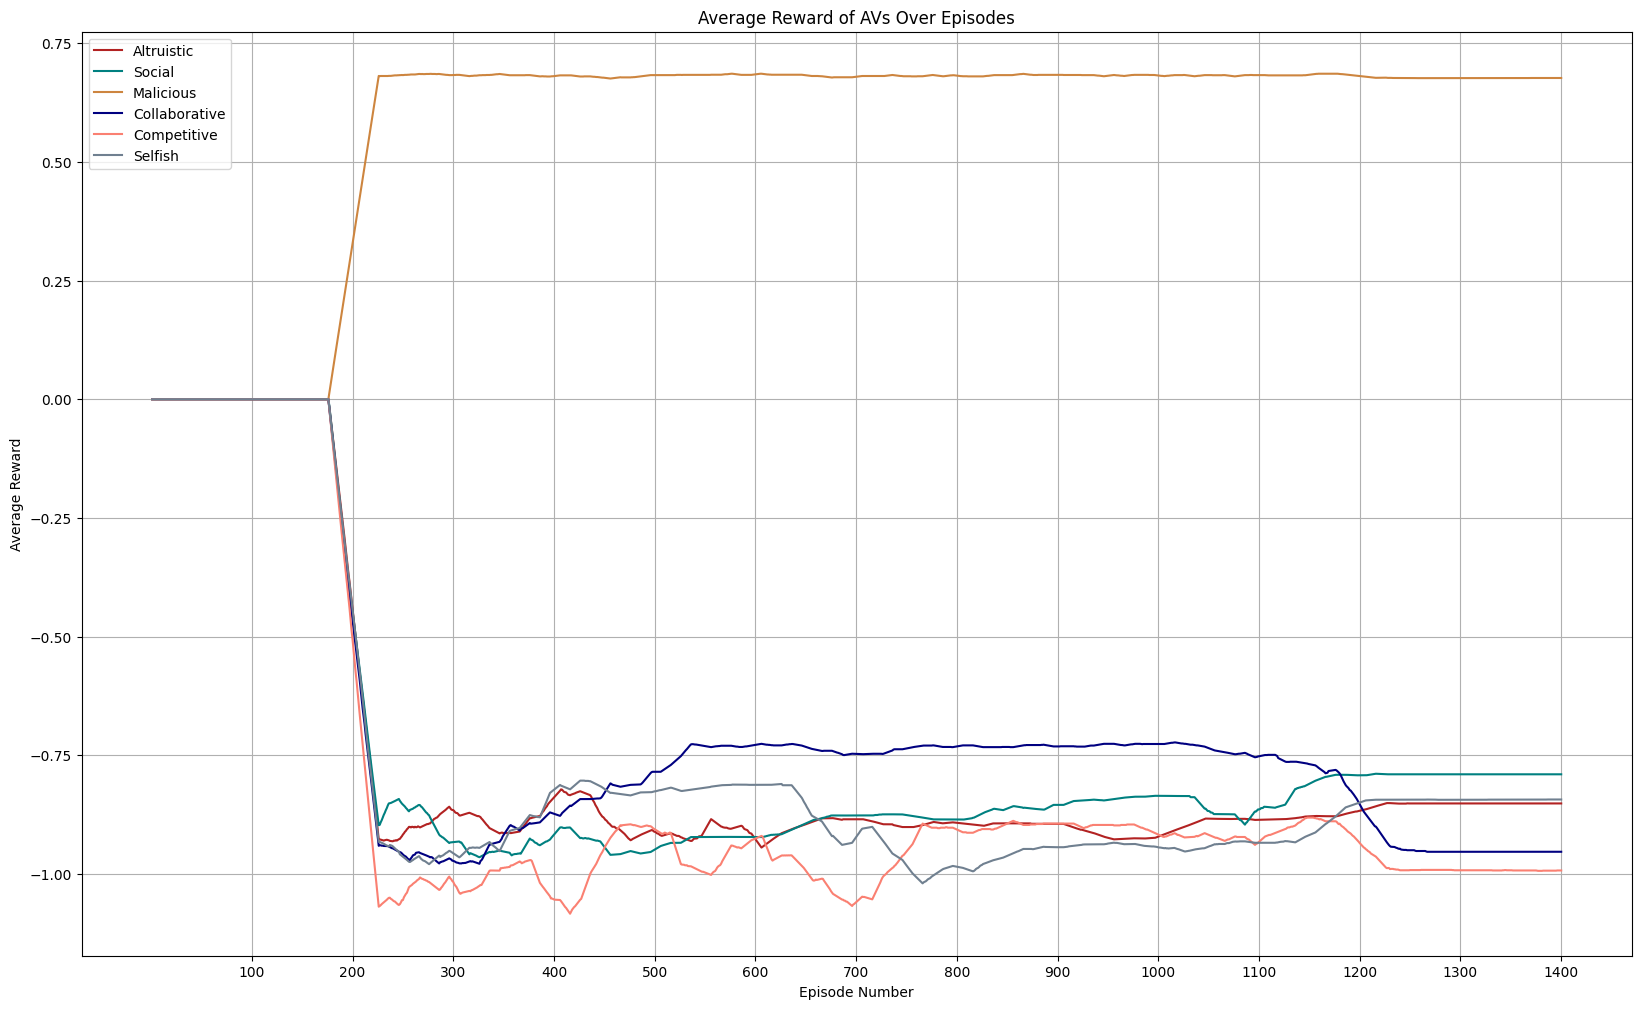

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np


folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot
colors = ["firebrick", "teal", "peru", "navy", "salmon", "slategray"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure
plt.figure(figsize=(20, 12))

# Iterate through all folder paths with corresponding colors
for folder_path, legend_name, color in zip(folder_paths, legend, colors):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and average travel times
    episodes = []
    avg_travel_times = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV rows
        av_df = df[df['kind'] == 'AV']

        # Calculate the average travel time for AV entries (reward in your case)
        avg_travel_time = av_df['reward'].mean()
        avg_travel_times.append(avg_travel_time)

    ## Transform NaN values to zero
    array_with_nans = np.array(avg_travel_times)
    array_without_nans = np.nan_to_num(array_with_nans, nan=0)

    # Convert back to list if needed
    avg_travel_times = array_without_nans.tolist()

    # Smooth the average travel times using uniform_filter1d
    avg_travel_times = uniform_filter1d(avg_travel_times, size=50)

    # Plot the results for the current folder on the same figure
    plt.plot(episodes, avg_travel_times, linestyle='-', color=color, label=legend_name)  # Apply color and label

# Customize the plot
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Average Reward of AVs Over Episodes')
plt.grid(True)

# Set x-ticks to show every 100 episodes
if episodes:
    plt.xticks([ep for ep in episodes if ep % 100 == 0])

# Show legend to differentiate between lines for each folder
plt.legend()

# Show the plot
plt.show()

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


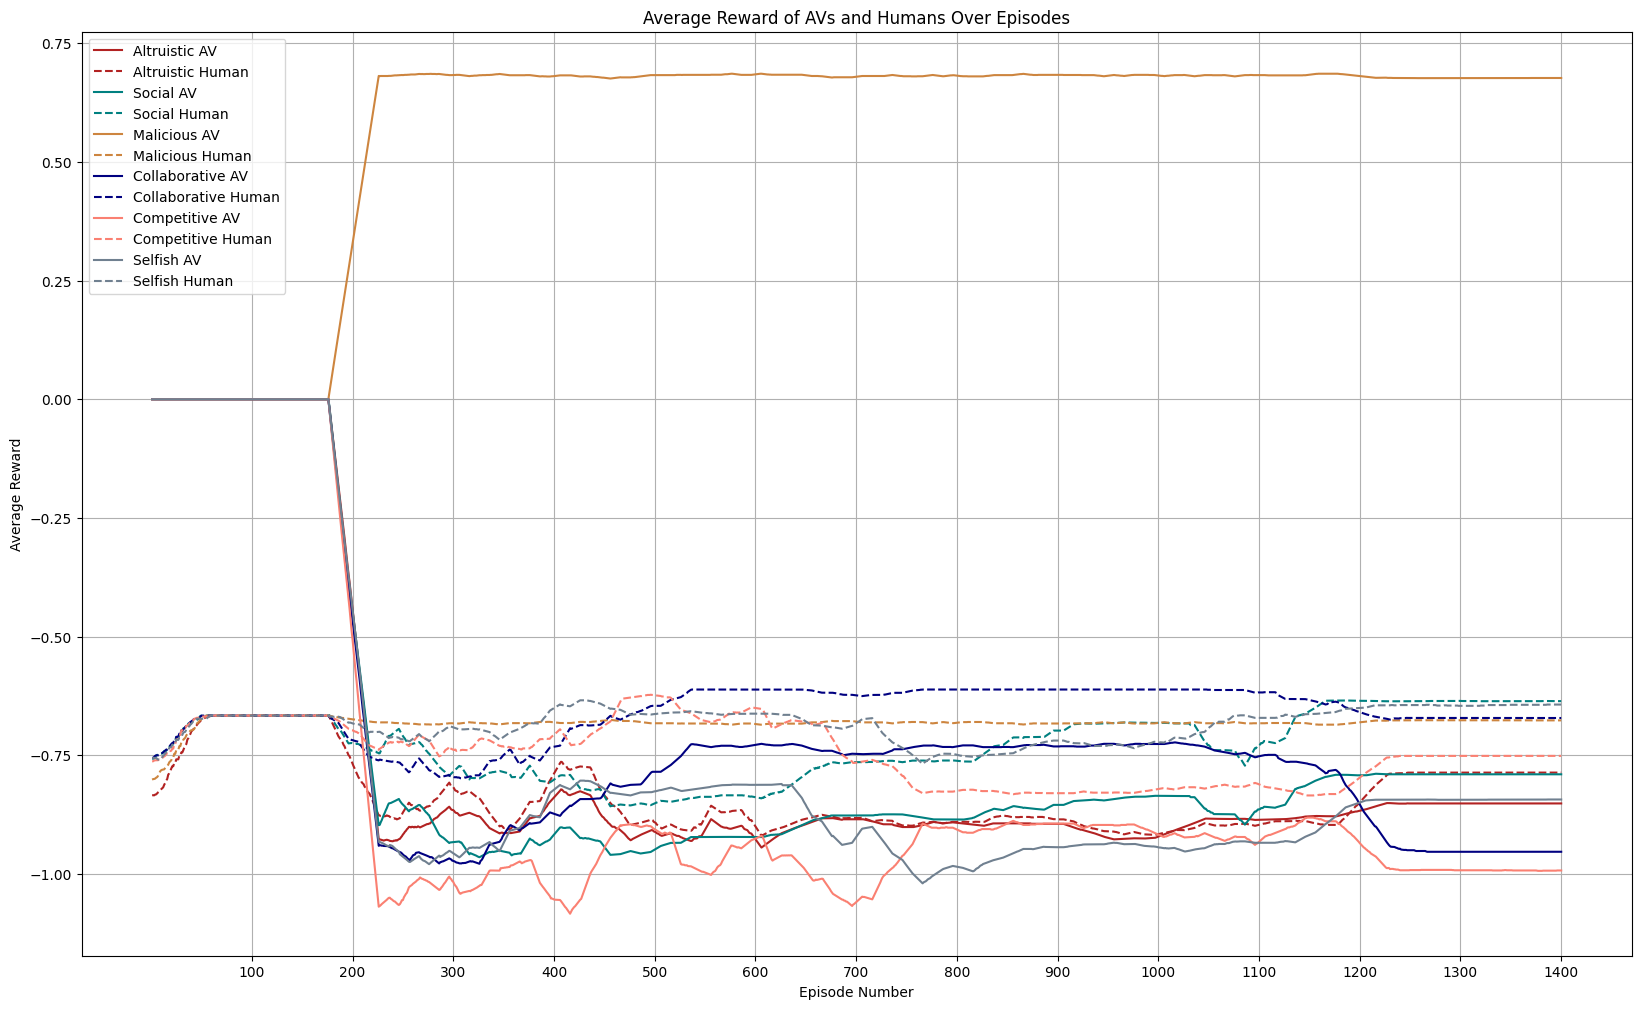

In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot
colors = ["firebrick", "teal", "peru", "navy", "salmon", "slategray"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure
plt.figure(figsize=(20, 12))

# Iterate through all folder paths with corresponding colors
for folder_path, legend_name, color in zip(folder_paths, legend, colors):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and average travel times
    episodes = []
    avg_travel_times_av = []
    avg_travel_times_human = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Calculate the average travel time for AV entries (reward in your case)
        avg_travel_time_av = av_df['reward'].mean()
        avg_travel_times_av.append(avg_travel_time_av)

        # Calculate the average travel time for Human entries (reward in your case)
        avg_travel_time_human = human_df['reward'].mean()
        avg_travel_times_human.append(avg_travel_time_human)

    ## Transform NaN values to zero
    array_with_nans_av = np.array(avg_travel_times_av)
    array_without_nans_av = np.nan_to_num(array_with_nans_av, nan=0)

    array_with_nans_human = np.array(avg_travel_times_human)
    array_without_nans_human = np.nan_to_num(array_with_nans_human, nan=0)

    # Convert back to list if needed
    avg_travel_times_av = array_without_nans_av.tolist()
    avg_travel_times_human = array_without_nans_human.tolist()

    # Smooth the average travel times using uniform_filter1d
    avg_travel_times_av = uniform_filter1d(avg_travel_times_av, size=50)
    avg_travel_times_human = uniform_filter1d(avg_travel_times_human, size=50)

    # Plot the results for the current folder on the same figure for both AV and Human
    plt.plot(episodes, avg_travel_times_av, linestyle='-', color=color, label=f'{legend_name} AV')  # Apply color and label for AV
    plt.plot(episodes, avg_travel_times_human, linestyle='--', color=color, label=f'{legend_name} Human')  # Apply dashed line and same color for Human

# Customize the plot
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Average Reward of AVs and Humans Over Episodes')
plt.grid(True)

# Set x-ticks to show every 100 episodes
if episodes:
    plt.xticks([ep for ep in episodes if ep % 100 == 0])

# Show legend to differentiate between lines for each folder and agent type
plt.legend()

# Show the plot
plt.show()

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


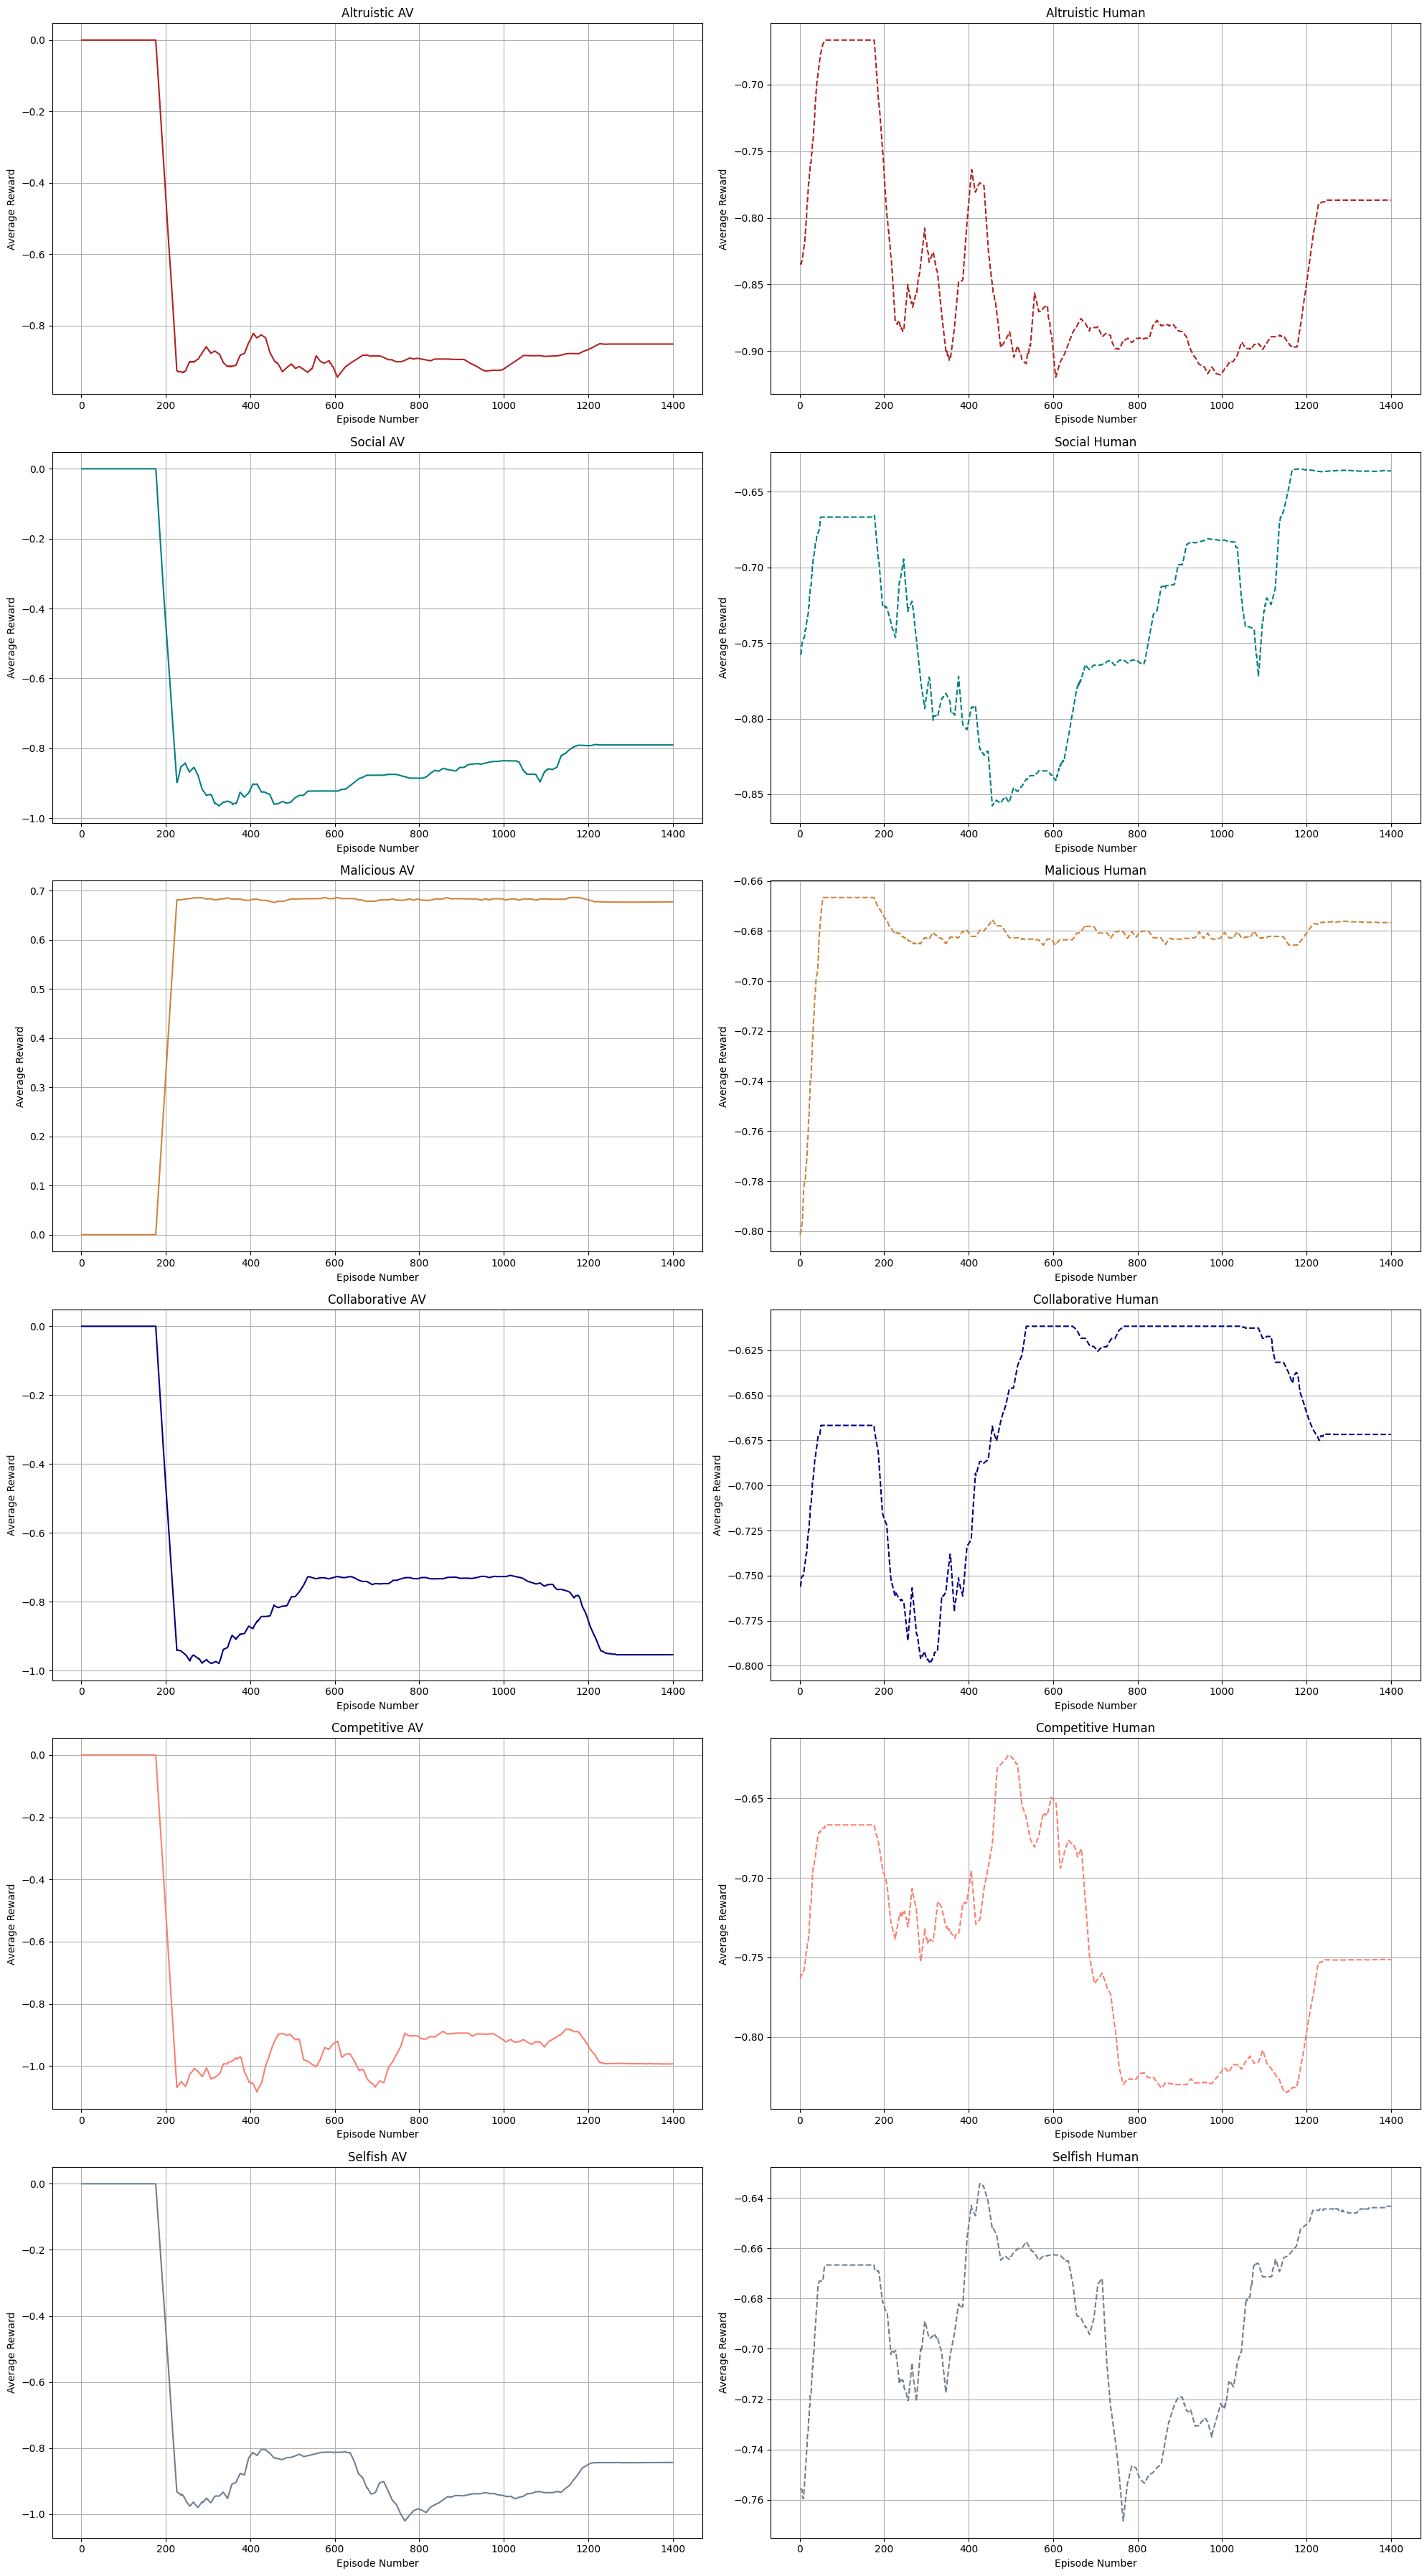

In [3]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot
colors = ["firebrick", "teal", "peru", "navy", "salmon", "slategray"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a figure with subplots for each folder (2 subplots for each behavior: AV and Human)
fig, axs = plt.subplots(len(folder_paths), 2, figsize=(20, len(folder_paths) * 6))  # 2 columns (one for AV, one for Human)

# Iterate through all folder paths with corresponding colors
for i, (folder_path, legend_name, color) in enumerate(zip(folder_paths, legend, colors)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and average travel times
    episodes = []
    avg_travel_times_av = []
    avg_travel_times_human = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Calculate the average travel time for AV entries (reward in your case)
        avg_travel_time_av = av_df['reward'].mean()
        avg_travel_times_av.append(avg_travel_time_av)

        # Calculate the average travel time for Human entries (reward in your case)
        avg_travel_time_human = human_df['reward'].mean()
        avg_travel_times_human.append(avg_travel_time_human)

    ## Transform NaN values to zero
    array_with_nans_av = np.array(avg_travel_times_av)
    array_without_nans_av = np.nan_to_num(array_with_nans_av, nan=0)

    array_with_nans_human = np.array(avg_travel_times_human)
    array_without_nans_human = np.nan_to_num(array_with_nans_human, nan=0)

    # Convert back to list if needed
    avg_travel_times_av = array_without_nans_av.tolist()
    avg_travel_times_human = array_without_nans_human.tolist()

    # Smooth the average travel times using uniform_filter1d
    avg_travel_times_av = uniform_filter1d(avg_travel_times_av, size=50)
    avg_travel_times_human = uniform_filter1d(avg_travel_times_human, size=50)

    # Plot the results for AVs in the left subplot (column 0)
    axs[i, 0].plot(episodes, avg_travel_times_av, linestyle='-', color=color, label=f'{legend_name} AV')
    axs[i, 0].set_title(f'{legend_name} AV')
    axs[i, 0].set_xlabel('Episode Number')
    axs[i, 0].set_ylabel('Average Reward')
    axs[i, 0].grid(True)

    # Plot the results for Humans in the right subplot (column 1)
    axs[i, 1].plot(episodes, avg_travel_times_human, linestyle='--', color=color, label=f'{legend_name} Human')
    axs[i, 1].set_title(f'{legend_name} Human')
    axs[i, 1].set_xlabel('Episode Number')
    axs[i, 1].set_ylabel('Average Reward')
    axs[i, 1].grid(True)

# Automatically adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()
